In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import ffmpeg

In [3]:
#libraries for audio processing
import librosa
import librosa.display
from IPython.display import Audio as ipd

In [4]:
path=glob.glob('./public_dataset/public_dataset/*.csv')

In [5]:
path_ogg = glob.glob('./public_dataset/public_dataset/*.ogg')

In [6]:
metadata=pd.read_csv(path[0])

In [11]:
metadata.head()

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
audio_files = glob.glob('./public_dataset/public_dataset/*.webm')

In [11]:
audio_files[0]

'./public_dataset/public_dataset\\00014dcc-0f06-4c27-8c7b-737b18a2cf4c.webm'

In [ ]:
len(audio_files)

In [11]:
metadata.describe()

,cough_detected,SNR,latitude,longitude,age
count,27550.000000,2.755000e+04,16084.000000,16084.000000,15218.000000
mean,0.649544,inf,33.242371,4.766706,36.800611
std,0.387850,NaN,21.191629,49.930993,14.599737
min,0.000000,-4.718740e+00,-54.800000,-158.100000,1.000000
25%,0.208225,5.794974e+00,33.700000,-4.100000,26.000000
50%,0.871300,1.212098e+01,40.900000,6.400000,35.000000
75%,0.986300,1.977735e+01,46.200000,30.500000,46.000000
max,1.000000,inf,65.100000,175.700000,102.000000


# EDA 

### Lets first visualize the audio

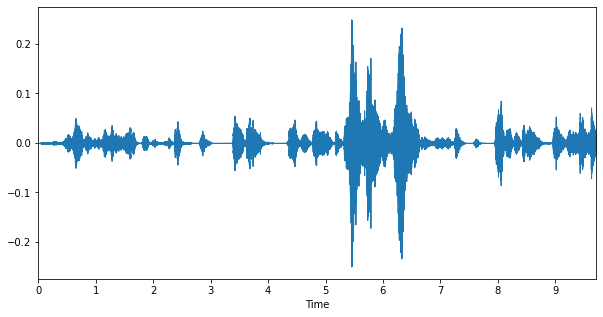

In [16]:
plt.figure(figsize=(10,5))
data, sample_rate = librosa.load(audio_files[7])
librosa.display.waveplot(data,sr=sample_rate)
ipd(audio_files[7])

#### Lets merge the webm and ogg file paths

In [12]:
audio_path = audio_files + path_ogg 

In [13]:
len(audio_path)

27550

#### Now lets analyze the csv file

In [27]:
metadata.isnull().sum()

uuid                         0
datetime                     0
cough_detected               0
SNR                          0
latitude                     0
longitude                11466
age                      12332
gender                   11326
respiratory_condition    11326
fever_muscle_pain        11326
status                   11326
quality_1                26730
cough_type_1             26748
dyspnea_1                26730
wheezing_1               26730
stridor_1                26730
choking_1                26730
congestion_1             26730
nothing_1                26730
diagnosis_1              26748
severity_1               26748
quality_2                26730
cough_type_2             26749
dyspnea_2                26730
wheezing_2               26730
stridor_2                26730
choking_2                26730
congestion_2             26730
nothing_2                26730
diagnosis_2              26748
severity_2               26748
quality_3                26730
cough_ty

In [14]:
md=len(metadata)
L=[]
for feature in metadata.columns:
    l=metadata[feature].isnull().sum()
    if l>0:
        print(f"{feature} has {(l/md)*100:.2f}% null values")
        if(l/md<0.7):
            L.append(feature)

latitude has 41.62% null values
longitude has 41.62% null values
age has 44.76% null values
gender has 41.11% null values
respiratory_condition has 41.11% null values
fever_muscle_pain has 41.11% null values
status has 41.11% null values
quality_1 has 97.02% null values
cough_type_1 has 97.09% null values
dyspnea_1 has 97.02% null values
wheezing_1 has 97.02% null values
stridor_1 has 97.02% null values
choking_1 has 97.02% null values
congestion_1 has 97.02% null values
nothing_1 has 97.02% null values
diagnosis_1 has 97.09% null values
severity_1 has 97.09% null values
quality_2 has 97.02% null values
cough_type_2 has 97.09% null values
dyspnea_2 has 97.02% null values
wheezing_2 has 97.02% null values
stridor_2 has 97.02% null values
choking_2 has 97.02% null values
congestion_2 has 97.02% null values
nothing_2 has 97.02% null values
diagnosis_2 has 97.09% null values
severity_2 has 97.09% null values
quality_3 has 97.02% null values
cough_type_3 has 97.11% null values
dyspnea_3 has

In [74]:
L

['latitude',
 'longitude',
 'age',
 'gender',
 'respiratory_condition',
 'fever_muscle_pain',
 'status']

#### Only the features present in L can be imputed

In [15]:
num_feat = [feature for feature in metadata.columns if metadata[feature].dtype!='O']

In [16]:
num_feat

['cough_detected', 'SNR', 'latitude', 'longitude', 'age']

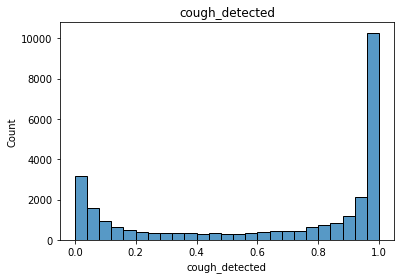

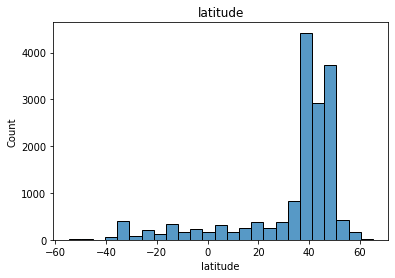

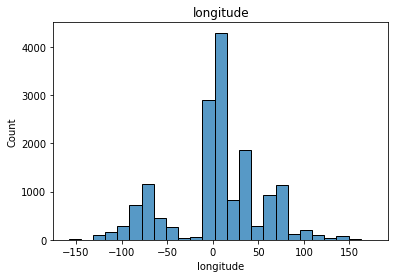

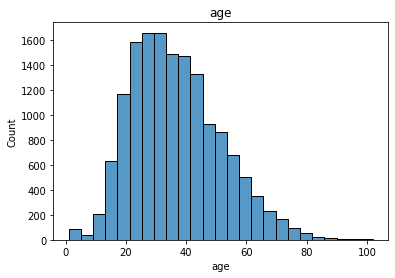

In [48]:
for feature in num_feat:
    if feature!='SNR':
        sns.histplot(metadata[feature],bins=25)
        plt.title(feature)
        plt.show()

Age and longitude have guassian curve whereas latitude is skewed


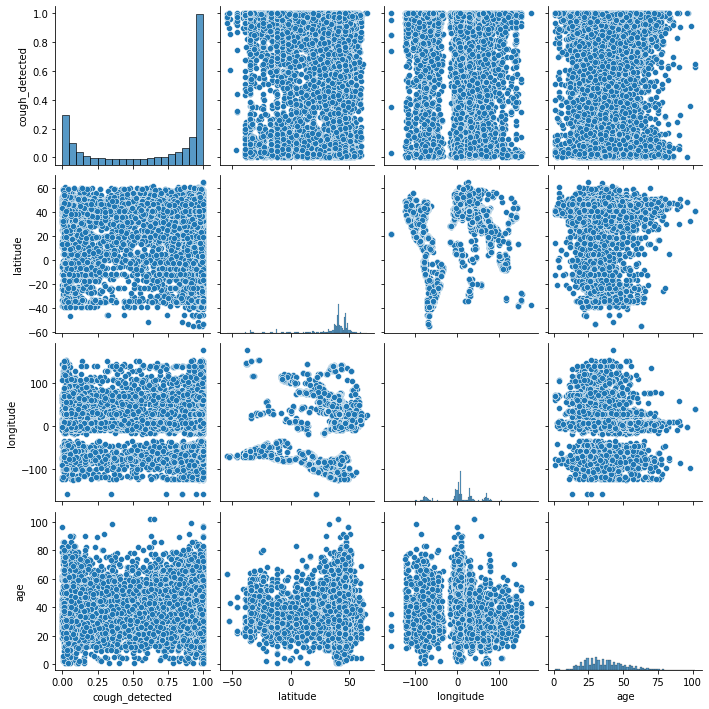

In [50]:
sns.pairplot(metadata[['cough_detected', 'latitude', 'longitude', 'age']])

<AxesSubplot:>

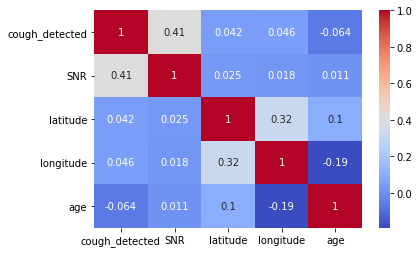

In [57]:
sns.heatmap(metadata[num_feat].corr(),annot=True,cmap='coolwarm')

We observe that SNR has strong coorelation with cough_detected

### Categorical Features

In [17]:
cat_features = [feature for feature in L if metadata[feature].dtype=='O']

In [18]:
cat_features

['gender', 'respiratory_condition', 'fever_muscle_pain', 'status']

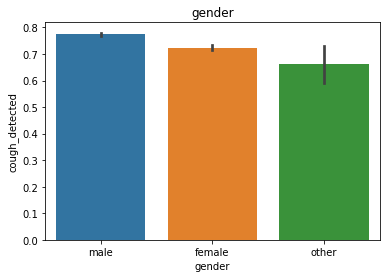

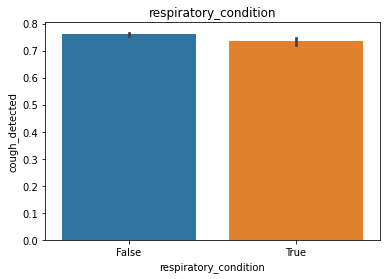

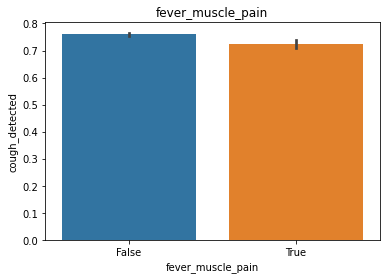

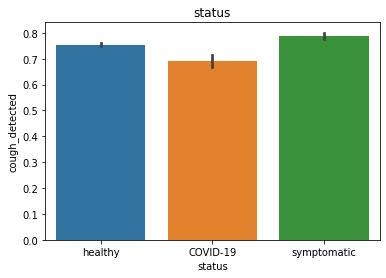

In [63]:
for feature in cat_features:
    sns.barplot(x=feature,y='cough_detected',data=metadata)
    plt.xlabel(feature)
    plt.ylabel('cough_detected')
    plt.title(feature)
    plt.show()

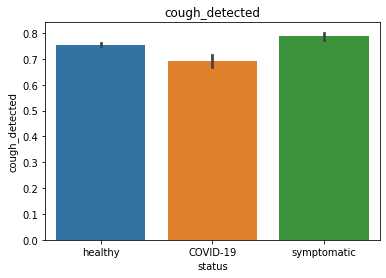

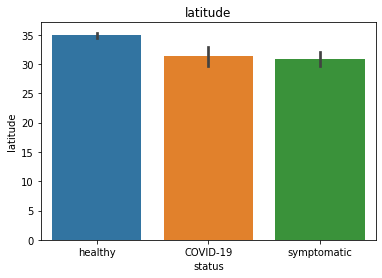

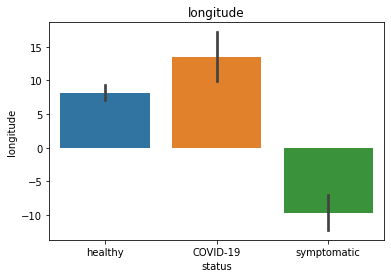

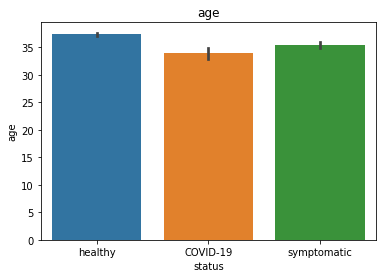

In [66]:
for feature in num_feat:
    if feature!='SNR':
        sns.barplot(x='status',y=feature,data=metadata)
        plt.xlabel('status')
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Outliers

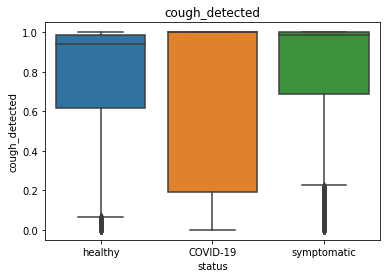

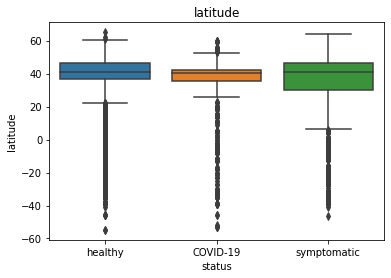

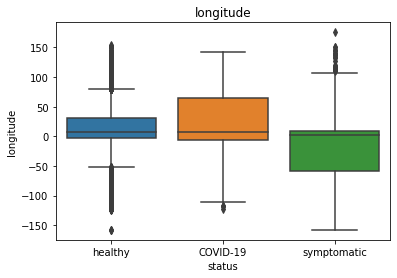

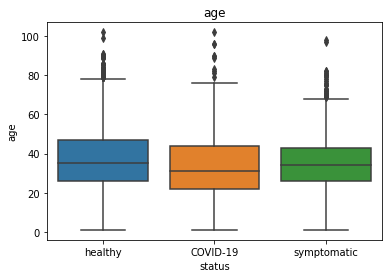

In [67]:
for feature in num_feat:
    if feature!='SNR':
        sns.boxplot(x='status',y=feature,data=metadata)
        plt.xlabel('status')
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Feature Engineering

#### Imputing null values

In [16]:
L

['latitude',
 'longitude',
 'age',
 'gender',
 'respiratory_condition',
 'fever_muscle_pain',
 'status']

### latitude and longitude

In [18]:
metadata['latitude'].median()

40.9

In [19]:
from Imputer import Imputer

In [66]:
## We will impute missing values with mean,mode and median so that the data doesn't become bias
impute = Imputer('latitude')

In [67]:
impute.fit(metadata['latitude'])

Imputer(variable='latitude')

In [68]:
metadata['latitude']=impute.transform(metadata)

In [69]:
impute = Imputer('longitude')
impute.fit(metadata['longitude'])
metadata['longitude']=impute.transform(metadata)

In [73]:
metadata[metadata['uuid']=='fe80e708-b652-410c-a3db-f16d102765e8']['longitude']

27392    4.766706
Name: longitude, dtype: object

In [74]:
longitude = metadata[['uuid','longitude']]

In [75]:
longitude.set_index('uuid',inplace=True)

### age

In [48]:
import random
def impute_age(cols):
    r=[30,35,36]
    if pd.isnull(cols):
        return random.choices(r)[0]
    return cols

In [49]:
metadata['age']=metadata['age'].apply(impute_age)

### gender


In [50]:
def impute_gender(cols):
    r=['male','female','other']
    if pd.isnull(cols):
        return random.choices(r)[0]
    return cols

In [51]:
metadata['gender']=metadata['gender'].apply(impute_gender)

### respiratory_condition

In [52]:
metadata['respiratory_condition'].sum()

2821

In [53]:
from numpy.random import choice
def resp_impute(cols):
    r=[False,True]
    if pd.isnull(cols):
        return random.choices(r,cum_weights=[25,40])[0]
    return cols

In [54]:
metadata['respiratory_condition']=metadata['respiratory_condition'].apply(resp_impute)

### Fever-muscle pain

In [55]:
metadata['fever_muscle_pain'].isnull().sum()

11326

In [56]:
metadata['fever_muscle_pain']=metadata['fever_muscle_pain'].apply(resp_impute)

### status

In [64]:
metadata['status'].value_counts()

healthy        12479
symptomatic     2590
COVID-19        1155
Name: status, dtype: int64

In [65]:
def impute_stat(cols):
    r=['healthy', 'COVID-19', 'symptomatic']
    if pd.isnull(cols):
        return random.choices(r,cum_weights=[9,25,40])[0]
    return cols

In [67]:
metadata['status']=metadata['status'].apply(impute_stat)

In [69]:
metadata.to_csv('metadata.csv',index=False)

In [19]:
metadata = pd.read_csv('./metadata.csv')

In [20]:
metadata.set_index('uuid',inplace=True)

## Feature Engineering

### Audio

In [19]:
data,sample_rate = librosa.load(audio_path[0])

e:\mlprojects\env\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [20]:
data

array([0.        , 0.        , 0.        , ..., 0.00169766, 0.00043305,
       0.00013799], dtype=float32)

In [21]:
sample_rate

22050

### We will use mfccs for getting information from audio files

In [22]:
mfccs = librosa.feature.mfcc(data,sample_rate,n_mfcc=30)

In [23]:
mfccs.shape

(30, 419)

In [21]:
#### Applying this to entire dataset of audio files
def extract_features(file):
    data,sample_rate=librosa.load(file)
    mfccs = librosa.feature.mfcc(data,sample_rate,n_mfcc=30)
    mfccs_scaled = np.mean(mfccs.T,axis=0)
    return mfccs_scaled

In [22]:
def get_id(file):
    path=file.split('\\')[1].split('.')[0]
    return path

In [26]:
extract_feat=[]
count=1
for file in audio_path:
    data = extract_features(file)
    Id = get_id(file)
    status=metadata.loc[Id]['status']
    extract_feat.append([data,status])
    print(f"{count}/27550")
    count+=1
print('Extraction completed')

e:\mlprojects\env\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/27550
2/27550
3/27550
4/27550
5/27550
6/27550
7/27550
8/27550
9/27550
10/27550
11/27550
12/27550
13/27550
14/27550
15/27550
16/27550
17/27550
18/27550
19/27550
20/27550
21/27550
22/27550
23/27550
24/27550
25/27550
26/27550
27/27550
28/27550
29/27550
30/27550
31/27550
32/27550
33/27550
34/27550
35/27550
36/27550
37/27550
38/27550
39/27550
40/27550
41/27550
42/27550
43/27550
44/27550
45/27550
46/27550
47/27550
48/27550
49/27550
50/27550
51/27550
52/27550
53/27550
54/27550
55/27550
56/27550
57/27550
58/27550
59/27550
60/27550
61/27550
62/27550
63/27550
64/27550
65/27550
66/27550
67/27550
68/27550
69/27550
70/27550
71/27550
72/27550
73/27550
74/27550
75/27550
76/27550
77/27550
78/27550
79/27550
80/27550
81/27550
82/27550
83/27550
84/27550
85/27550
86/27550
87/27550
88/27550
89/27550
90/27550
91/27550
92/27550
93/27550
94/27550
95/27550
96/27550
97/27550
98/27550
99/27550
100/27550
101/27550
102/27550
103/27550
104/27550
105/27550
106/27550
107/27550
108/27550
109/27550
110/27550
111/2755

832/27550
833/27550
834/27550
835/27550
836/27550
837/27550
838/27550
839/27550
840/27550
841/27550
842/27550
843/27550
844/27550
845/27550
846/27550
847/27550
848/27550
849/27550
850/27550
851/27550
852/27550
853/27550
854/27550
855/27550
856/27550
857/27550
858/27550
859/27550
860/27550
861/27550
862/27550
863/27550
864/27550
865/27550
866/27550
867/27550
868/27550
869/27550
870/27550
871/27550
872/27550
873/27550
874/27550
875/27550
876/27550
877/27550
878/27550
879/27550
880/27550
881/27550
882/27550
883/27550
884/27550
885/27550
886/27550
887/27550
888/27550
889/27550
890/27550
891/27550
892/27550
893/27550
894/27550
895/27550
896/27550
897/27550
898/27550
899/27550
900/27550
901/27550
902/27550
903/27550
904/27550
905/27550
906/27550
907/27550
908/27550
909/27550
910/27550
911/27550
912/27550
913/27550
914/27550
915/27550
916/27550
917/27550
918/27550
919/27550
920/27550
921/27550
922/27550
923/27550
924/27550
925/27550
926/27550
927/27550
928/27550
929/27550
930/27550
931/27550


1593/27550
1594/27550
1595/27550
1596/27550
1597/27550
1598/27550
1599/27550
1600/27550
1601/27550
1602/27550
1603/27550
1604/27550
1605/27550
1606/27550
1607/27550
1608/27550
1609/27550
1610/27550
1611/27550
1612/27550
1613/27550
1614/27550
1615/27550
1616/27550
1617/27550
1618/27550
1619/27550
1620/27550
1621/27550
1622/27550
1623/27550
1624/27550
1625/27550
1626/27550
1627/27550
1628/27550
1629/27550
1630/27550
1631/27550
1632/27550
1633/27550
1634/27550
1635/27550
1636/27550
1637/27550
1638/27550
1639/27550
1640/27550
1641/27550
1642/27550
1643/27550
1644/27550
1645/27550
1646/27550
1647/27550
1648/27550
1649/27550
1650/27550
1651/27550
1652/27550
1653/27550
1654/27550
1655/27550
1656/27550
1657/27550
1658/27550
1659/27550
1660/27550
1661/27550
1662/27550
1663/27550
1664/27550
1665/27550
1666/27550
1667/27550
1668/27550
1669/27550
1670/27550
1671/27550
1672/27550
1673/27550
1674/27550
1675/27550
1676/27550
1677/27550
1678/27550
1679/27550
1680/27550
1681/27550
1682/27550
1683/27550

2338/27550
2339/27550
2340/27550
2341/27550
2342/27550
2343/27550
2344/27550
2345/27550
2346/27550
2347/27550
2348/27550
2349/27550
2350/27550
2351/27550
2352/27550
2353/27550
2354/27550
2355/27550
2356/27550
2357/27550
2358/27550
2359/27550
2360/27550
2361/27550
2362/27550
2363/27550
2364/27550
2365/27550
2366/27550
2367/27550
2368/27550
2369/27550
2370/27550
2371/27550
2372/27550
2373/27550
2374/27550
2375/27550
2376/27550
2377/27550
2378/27550
2379/27550
2380/27550
2381/27550
2382/27550
2383/27550
2384/27550
2385/27550
2386/27550
2387/27550
2388/27550
2389/27550
2390/27550
2391/27550
2392/27550
2393/27550
2394/27550
2395/27550
2396/27550
2397/27550
2398/27550
2399/27550
2400/27550
2401/27550
2402/27550
2403/27550
2404/27550
2405/27550
2406/27550
2407/27550
2408/27550
2409/27550
2410/27550
2411/27550
2412/27550
2413/27550
2414/27550
2415/27550
2416/27550
2417/27550
2418/27550
2419/27550
2420/27550
2421/27550
2422/27550
2423/27550
2424/27550
2425/27550
2426/27550
2427/27550
2428/27550

3083/27550
3084/27550
3085/27550
3086/27550
3087/27550
3088/27550
3089/27550
3090/27550
3091/27550
3092/27550
3093/27550
3094/27550
3095/27550
3096/27550
3097/27550
3098/27550
3099/27550
3100/27550
3101/27550
3102/27550
3103/27550
3104/27550
3105/27550
3106/27550
3107/27550
3108/27550
3109/27550
3110/27550
3111/27550
3112/27550
3113/27550
3114/27550
3115/27550
3116/27550
3117/27550
3118/27550
3119/27550
3120/27550
3121/27550
3122/27550
3123/27550
3124/27550
3125/27550
3126/27550
3127/27550
3128/27550
3129/27550
3130/27550
3131/27550
3132/27550
3133/27550
3134/27550
3135/27550
3136/27550
3137/27550
3138/27550
3139/27550
3140/27550
3141/27550
3142/27550
3143/27550
3144/27550
3145/27550
3146/27550
3147/27550
3148/27550
3149/27550
3150/27550
3151/27550
3152/27550
3153/27550
3154/27550
3155/27550
3156/27550
3157/27550
3158/27550
3159/27550
3160/27550
3161/27550
3162/27550
3163/27550
3164/27550
3165/27550
3166/27550
3167/27550
3168/27550
3169/27550
3170/27550
3171/27550
3172/27550
3173/27550

3828/27550
3829/27550
3830/27550
3831/27550
3832/27550
3833/27550
3834/27550
3835/27550
3836/27550
3837/27550
3838/27550
3839/27550
3840/27550
3841/27550
3842/27550
3843/27550
3844/27550
3845/27550
3846/27550
3847/27550
3848/27550
3849/27550
3850/27550
3851/27550
3852/27550
3853/27550
3854/27550
3855/27550
3856/27550
3857/27550
3858/27550
3859/27550
3860/27550
3861/27550
3862/27550
3863/27550
3864/27550
3865/27550
3866/27550
3867/27550
3868/27550
3869/27550
3870/27550
3871/27550
3872/27550
3873/27550
3874/27550
3875/27550
3876/27550
3877/27550
3878/27550
3879/27550
3880/27550
3881/27550
3882/27550
3883/27550
3884/27550
3885/27550
3886/27550
3887/27550
3888/27550
3889/27550
3890/27550
3891/27550
3892/27550
3893/27550
3894/27550
3895/27550
3896/27550
3897/27550
3898/27550
3899/27550
3900/27550
3901/27550
3902/27550
3903/27550
3904/27550
3905/27550
3906/27550
3907/27550
3908/27550
3909/27550
3910/27550
3911/27550
3912/27550
3913/27550
3914/27550
3915/27550
3916/27550
3917/27550
3918/27550

4573/27550
4574/27550
4575/27550
4576/27550
4577/27550
4578/27550
4579/27550
4580/27550
4581/27550
4582/27550
4583/27550
4584/27550
4585/27550
4586/27550
4587/27550
4588/27550
4589/27550
4590/27550
4591/27550
4592/27550
4593/27550
4594/27550
4595/27550
4596/27550
4597/27550
4598/27550
4599/27550
4600/27550
4601/27550
4602/27550
4603/27550
4604/27550
4605/27550
4606/27550
4607/27550
4608/27550
4609/27550
4610/27550
4611/27550
4612/27550
4613/27550
4614/27550
4615/27550
4616/27550
4617/27550
4618/27550
4619/27550
4620/27550
4621/27550
4622/27550
4623/27550
4624/27550
4625/27550
4626/27550
4627/27550
4628/27550
4629/27550
4630/27550
4631/27550
4632/27550
4633/27550
4634/27550
4635/27550
4636/27550
4637/27550
4638/27550
4639/27550
4640/27550
4641/27550
4642/27550
4643/27550
4644/27550
4645/27550
4646/27550
4647/27550
4648/27550
4649/27550
4650/27550
4651/27550
4652/27550
4653/27550
4654/27550
4655/27550
4656/27550
4657/27550
4658/27550
4659/27550
4660/27550
4661/27550
4662/27550
4663/27550

5318/27550
5319/27550
5320/27550
5321/27550
5322/27550
5323/27550
5324/27550
5325/27550
5326/27550
5327/27550
5328/27550
5329/27550
5330/27550
5331/27550
5332/27550
5333/27550
5334/27550
5335/27550
5336/27550
5337/27550
5338/27550
5339/27550
5340/27550
5341/27550
5342/27550
5343/27550
5344/27550
5345/27550
5346/27550
5347/27550
5348/27550
5349/27550
5350/27550
5351/27550
5352/27550
5353/27550
5354/27550
5355/27550
5356/27550
5357/27550
5358/27550
5359/27550
5360/27550
5361/27550
5362/27550
5363/27550
5364/27550
5365/27550
5366/27550
5367/27550
5368/27550
5369/27550
5370/27550
5371/27550
5372/27550
5373/27550
5374/27550
5375/27550
5376/27550
5377/27550
5378/27550
5379/27550
5380/27550
5381/27550
5382/27550
5383/27550
5384/27550
5385/27550
5386/27550
5387/27550
5388/27550
5389/27550
5390/27550
5391/27550
5392/27550
5393/27550
5394/27550
5395/27550
5396/27550
5397/27550
5398/27550
5399/27550
5400/27550
5401/27550
5402/27550
5403/27550
5404/27550
5405/27550
5406/27550
5407/27550
5408/27550

6063/27550
6064/27550
6065/27550
6066/27550
6067/27550
6068/27550
6069/27550
6070/27550
6071/27550
6072/27550
6073/27550
6074/27550
6075/27550
6076/27550
6077/27550
6078/27550
6079/27550
6080/27550
6081/27550
6082/27550
6083/27550
6084/27550
6085/27550
6086/27550
6087/27550
6088/27550
6089/27550
6090/27550
6091/27550
6092/27550
6093/27550
6094/27550
6095/27550
6096/27550
6097/27550
6098/27550
6099/27550
6100/27550
6101/27550
6102/27550
6103/27550
6104/27550
6105/27550
6106/27550
6107/27550
6108/27550
6109/27550
6110/27550
6111/27550
6112/27550
6113/27550
6114/27550
6115/27550
6116/27550
6117/27550
6118/27550
6119/27550
6120/27550
6121/27550
6122/27550
6123/27550
6124/27550
6125/27550
6126/27550
6127/27550
6128/27550
6129/27550
6130/27550
6131/27550
6132/27550
6133/27550
6134/27550
6135/27550
6136/27550
6137/27550
6138/27550
6139/27550
6140/27550
6141/27550
6142/27550
6143/27550
6144/27550
6145/27550
6146/27550
6147/27550
6148/27550
6149/27550
6150/27550
6151/27550
6152/27550
6153/27550

6808/27550
6809/27550
6810/27550
6811/27550
6812/27550
6813/27550
6814/27550
6815/27550
6816/27550
6817/27550
6818/27550
6819/27550
6820/27550
6821/27550
6822/27550
6823/27550
6824/27550
6825/27550
6826/27550
6827/27550
6828/27550
6829/27550
6830/27550
6831/27550
6832/27550
6833/27550
6834/27550
6835/27550
6836/27550
6837/27550
6838/27550
6839/27550
6840/27550
6841/27550
6842/27550
6843/27550
6844/27550
6845/27550
6846/27550
6847/27550
6848/27550
6849/27550
6850/27550
6851/27550
6852/27550
6853/27550
6854/27550
6855/27550
6856/27550
6857/27550
6858/27550
6859/27550
6860/27550
6861/27550
6862/27550
6863/27550
6864/27550
6865/27550
6866/27550
6867/27550
6868/27550
6869/27550
6870/27550
6871/27550
6872/27550
6873/27550
6874/27550
6875/27550
6876/27550
6877/27550
6878/27550
6879/27550
6880/27550
6881/27550
6882/27550
6883/27550
6884/27550
6885/27550
6886/27550
6887/27550
6888/27550
6889/27550
6890/27550
6891/27550
6892/27550
6893/27550
6894/27550
6895/27550
6896/27550
6897/27550
6898/27550

7553/27550
7554/27550
7555/27550
7556/27550
7557/27550
7558/27550
7559/27550
7560/27550
7561/27550
7562/27550
7563/27550
7564/27550
7565/27550
7566/27550
7567/27550
7568/27550
7569/27550
7570/27550
7571/27550
7572/27550
7573/27550
7574/27550
7575/27550
7576/27550
7577/27550
7578/27550
7579/27550
7580/27550
7581/27550
7582/27550
7583/27550
7584/27550
7585/27550
7586/27550
7587/27550
7588/27550
7589/27550
7590/27550
7591/27550
7592/27550
7593/27550
7594/27550
7595/27550
7596/27550
7597/27550
7598/27550
7599/27550
7600/27550
7601/27550
7602/27550
7603/27550
7604/27550
7605/27550
7606/27550
7607/27550
7608/27550
7609/27550
7610/27550
7611/27550
7612/27550
7613/27550
7614/27550
7615/27550
7616/27550
7617/27550
7618/27550
7619/27550
7620/27550
7621/27550
7622/27550
7623/27550
7624/27550
7625/27550
7626/27550
7627/27550
7628/27550
7629/27550
7630/27550
7631/27550
7632/27550
7633/27550
7634/27550
7635/27550
7636/27550
7637/27550
7638/27550
7639/27550
7640/27550
7641/27550
7642/27550
7643/27550

8298/27550
8299/27550
8300/27550
8301/27550
8302/27550
8303/27550
8304/27550
8305/27550
8306/27550
8307/27550
8308/27550
8309/27550
8310/27550
8311/27550
8312/27550
8313/27550
8314/27550
8315/27550
8316/27550
8317/27550
8318/27550
8319/27550
8320/27550
8321/27550
8322/27550
8323/27550
8324/27550
8325/27550
8326/27550
8327/27550
8328/27550
8329/27550
8330/27550
8331/27550
8332/27550
8333/27550
8334/27550
8335/27550
8336/27550
8337/27550
8338/27550
8339/27550
8340/27550
8341/27550
8342/27550
8343/27550
8344/27550
8345/27550
8346/27550
8347/27550
8348/27550
8349/27550
8350/27550
8351/27550
8352/27550
8353/27550
8354/27550
8355/27550
8356/27550
8357/27550
8358/27550
8359/27550
8360/27550
8361/27550
8362/27550
8363/27550
8364/27550
8365/27550
8366/27550
8367/27550
8368/27550
8369/27550
8370/27550
8371/27550
8372/27550
8373/27550
8374/27550
8375/27550
8376/27550
8377/27550
8378/27550
8379/27550
8380/27550
8381/27550
8382/27550
8383/27550
8384/27550
8385/27550
8386/27550
8387/27550
8388/27550

9043/27550
9044/27550
9045/27550
9046/27550
9047/27550
9048/27550
9049/27550
9050/27550
9051/27550
9052/27550
9053/27550
9054/27550
9055/27550
9056/27550
9057/27550
9058/27550
9059/27550
9060/27550
9061/27550
9062/27550
9063/27550
9064/27550
9065/27550
9066/27550
9067/27550
9068/27550
9069/27550
9070/27550
9071/27550
9072/27550
9073/27550
9074/27550
9075/27550
9076/27550
9077/27550
9078/27550
9079/27550
9080/27550
9081/27550
9082/27550
9083/27550
9084/27550
9085/27550
9086/27550
9087/27550
9088/27550
9089/27550
9090/27550
9091/27550
9092/27550
9093/27550
9094/27550
9095/27550
9096/27550
9097/27550
9098/27550
9099/27550
9100/27550
9101/27550
9102/27550
9103/27550
9104/27550
9105/27550
9106/27550
9107/27550
9108/27550
9109/27550
9110/27550
9111/27550
9112/27550
9113/27550
9114/27550
9115/27550
9116/27550
9117/27550
9118/27550
9119/27550
9120/27550
9121/27550
9122/27550
9123/27550
9124/27550
9125/27550
9126/27550
9127/27550
9128/27550
9129/27550
9130/27550
9131/27550
9132/27550
9133/27550

9788/27550
9789/27550
9790/27550
9791/27550
9792/27550
9793/27550
9794/27550
9795/27550
9796/27550
9797/27550
9798/27550
9799/27550
9800/27550
9801/27550
9802/27550
9803/27550
9804/27550
9805/27550
9806/27550
9807/27550
9808/27550
9809/27550
9810/27550
9811/27550
9812/27550
9813/27550
9814/27550
9815/27550
9816/27550
9817/27550
9818/27550
9819/27550
9820/27550
9821/27550
9822/27550
9823/27550
9824/27550
9825/27550
9826/27550
9827/27550
9828/27550
9829/27550
9830/27550
9831/27550
9832/27550
9833/27550
9834/27550
9835/27550
9836/27550
9837/27550
9838/27550
9839/27550
9840/27550
9841/27550
9842/27550
9843/27550
9844/27550
9845/27550
9846/27550
9847/27550
9848/27550
9849/27550
9850/27550
9851/27550
9852/27550
9853/27550
9854/27550
9855/27550
9856/27550
9857/27550
9858/27550
9859/27550
9860/27550
9861/27550
9862/27550
9863/27550
9864/27550
9865/27550
9866/27550
9867/27550
9868/27550
9869/27550
9870/27550
9871/27550
9872/27550
9873/27550
9874/27550
9875/27550
9876/27550
9877/27550
9878/27550

10489/27550
10490/27550
10491/27550
10492/27550
10493/27550
10494/27550
10495/27550
10496/27550
10497/27550
10498/27550
10499/27550
10500/27550
10501/27550
10502/27550
10503/27550
10504/27550
10505/27550
10506/27550
10507/27550
10508/27550
10509/27550
10510/27550
10511/27550
10512/27550
10513/27550
10514/27550
10515/27550
10516/27550
10517/27550
10518/27550
10519/27550
10520/27550
10521/27550
10522/27550
10523/27550
10524/27550
10525/27550
10526/27550
10527/27550
10528/27550
10529/27550
10530/27550
10531/27550
10532/27550
10533/27550
10534/27550
10535/27550
10536/27550
10537/27550
10538/27550
10539/27550
10540/27550
10541/27550
10542/27550
10543/27550
10544/27550
10545/27550
10546/27550
10547/27550
10548/27550
10549/27550
10550/27550
10551/27550
10552/27550
10553/27550
10554/27550
10555/27550
10556/27550
10557/27550
10558/27550
10559/27550
10560/27550
10561/27550
10562/27550
10563/27550
10564/27550
10565/27550
10566/27550
10567/27550
10568/27550
10569/27550
10570/27550
10571/27550
1057

11172/27550
11173/27550
11174/27550
11175/27550
11176/27550
11177/27550
11178/27550
11179/27550
11180/27550
11181/27550
11182/27550
11183/27550
11184/27550
11185/27550
11186/27550
11187/27550
11188/27550
11189/27550
11190/27550
11191/27550
11192/27550
11193/27550
11194/27550
11195/27550
11196/27550
11197/27550
11198/27550
11199/27550
11200/27550
11201/27550
11202/27550
11203/27550
11204/27550
11205/27550
11206/27550
11207/27550
11208/27550
11209/27550
11210/27550
11211/27550
11212/27550
11213/27550
11214/27550
11215/27550
11216/27550
11217/27550
11218/27550
11219/27550
11220/27550
11221/27550
11222/27550
11223/27550
11224/27550
11225/27550
11226/27550
11227/27550
11228/27550
11229/27550
11230/27550
11231/27550
11232/27550
11233/27550
11234/27550
11235/27550
11236/27550
11237/27550
11238/27550
11239/27550
11240/27550
11241/27550
11242/27550
11243/27550
11244/27550
11245/27550
11246/27550
11247/27550
11248/27550
11249/27550
11250/27550
11251/27550
11252/27550
11253/27550
11254/27550
1125

11855/27550
11856/27550
11857/27550
11858/27550
11859/27550
11860/27550
11861/27550
11862/27550
11863/27550
11864/27550
11865/27550
11866/27550
11867/27550
11868/27550
11869/27550
11870/27550
11871/27550
11872/27550
11873/27550
11874/27550
11875/27550
11876/27550
11877/27550
11878/27550
11879/27550
11880/27550
11881/27550
11882/27550
11883/27550
11884/27550
11885/27550
11886/27550
11887/27550
11888/27550
11889/27550
11890/27550
11891/27550
11892/27550
11893/27550
11894/27550
11895/27550
11896/27550
11897/27550
11898/27550
11899/27550
11900/27550
11901/27550
11902/27550
11903/27550
11904/27550
11905/27550
11906/27550
11907/27550
11908/27550
11909/27550
11910/27550
11911/27550
11912/27550
11913/27550
11914/27550
11915/27550
11916/27550
11917/27550
11918/27550
11919/27550
11920/27550
11921/27550
11922/27550
11923/27550
11924/27550
11925/27550
11926/27550
11927/27550
11928/27550
11929/27550
11930/27550
11931/27550
11932/27550
11933/27550
11934/27550
11935/27550
11936/27550
11937/27550
1193

12538/27550
12539/27550
12540/27550
12541/27550
12542/27550
12543/27550
12544/27550
12545/27550
12546/27550
12547/27550
12548/27550
12549/27550
12550/27550
12551/27550
12552/27550
12553/27550
12554/27550
12555/27550
12556/27550
12557/27550
12558/27550
12559/27550
12560/27550
12561/27550
12562/27550
12563/27550
12564/27550
12565/27550
12566/27550
12567/27550
12568/27550
12569/27550
12570/27550
12571/27550
12572/27550
12573/27550
12574/27550
12575/27550
12576/27550
12577/27550
12578/27550
12579/27550
12580/27550
12581/27550
12582/27550
12583/27550
12584/27550
12585/27550
12586/27550
12587/27550
12588/27550
12589/27550
12590/27550
12591/27550
12592/27550
12593/27550
12594/27550
12595/27550
12596/27550
12597/27550
12598/27550
12599/27550
12600/27550
12601/27550
12602/27550
12603/27550
12604/27550
12605/27550
12606/27550
12607/27550
12608/27550
12609/27550
12610/27550
12611/27550
12612/27550
12613/27550
12614/27550
12615/27550
12616/27550
12617/27550
12618/27550
12619/27550
12620/27550
1262

13221/27550
13222/27550
13223/27550
13224/27550
13225/27550
13226/27550
13227/27550
13228/27550
13229/27550
13230/27550
13231/27550
13232/27550
13233/27550
13234/27550
13235/27550
13236/27550
13237/27550
13238/27550
13239/27550
13240/27550
13241/27550
13242/27550
13243/27550
13244/27550
13245/27550
13246/27550
13247/27550
13248/27550
13249/27550
13250/27550
13251/27550
13252/27550
13253/27550
13254/27550
13255/27550
13256/27550
13257/27550
13258/27550
13259/27550
13260/27550
13261/27550
13262/27550
13263/27550
13264/27550
13265/27550
13266/27550
13267/27550
13268/27550
13269/27550
13270/27550
13271/27550
13272/27550
13273/27550
13274/27550
13275/27550
13276/27550
13277/27550
13278/27550
13279/27550
13280/27550
13281/27550
13282/27550
13283/27550
13284/27550
13285/27550
13286/27550
13287/27550
13288/27550
13289/27550
13290/27550
13291/27550
13292/27550
13293/27550
13294/27550
13295/27550
13296/27550
13297/27550
13298/27550
13299/27550
13300/27550
13301/27550
13302/27550
13303/27550
1330

13904/27550
13905/27550
13906/27550
13907/27550
13908/27550
13909/27550
13910/27550
13911/27550
13912/27550
13913/27550
13914/27550
13915/27550
13916/27550
13917/27550
13918/27550
13919/27550
13920/27550
13921/27550
13922/27550
13923/27550
13924/27550
13925/27550
13926/27550
13927/27550
13928/27550
13929/27550
13930/27550
13931/27550
13932/27550
13933/27550
13934/27550
13935/27550
13936/27550
13937/27550
13938/27550
13939/27550
13940/27550
13941/27550
13942/27550
13943/27550
13944/27550
13945/27550
13946/27550
13947/27550
13948/27550
13949/27550
13950/27550
13951/27550
13952/27550
13953/27550
13954/27550
13955/27550
13956/27550
13957/27550
13958/27550
13959/27550
13960/27550
13961/27550
13962/27550
13963/27550
13964/27550
13965/27550
13966/27550
13967/27550
13968/27550
13969/27550
13970/27550
13971/27550
13972/27550
13973/27550
13974/27550
13975/27550
13976/27550
13977/27550
13978/27550
13979/27550
13980/27550
13981/27550
13982/27550
13983/27550
13984/27550
13985/27550
13986/27550
1398

14587/27550
14588/27550
14589/27550
14590/27550
14591/27550
14592/27550
14593/27550
14594/27550
14595/27550
14596/27550
14597/27550
14598/27550
14599/27550
14600/27550
14601/27550
14602/27550
14603/27550
14604/27550
14605/27550
14606/27550
14607/27550
14608/27550
14609/27550
14610/27550
14611/27550
14612/27550
14613/27550
14614/27550
14615/27550
14616/27550
14617/27550
14618/27550
14619/27550
14620/27550
14621/27550
14622/27550
14623/27550
14624/27550
14625/27550
14626/27550
14627/27550
14628/27550
14629/27550
14630/27550
14631/27550
14632/27550
14633/27550
14634/27550
14635/27550
14636/27550
14637/27550
14638/27550
14639/27550
14640/27550
14641/27550
14642/27550
14643/27550
14644/27550
14645/27550
14646/27550
14647/27550
14648/27550
14649/27550
14650/27550
14651/27550
14652/27550
14653/27550
14654/27550
14655/27550
14656/27550
14657/27550
14658/27550
14659/27550
14660/27550
14661/27550
14662/27550
14663/27550
14664/27550
14665/27550
14666/27550
14667/27550
14668/27550
14669/27550
1467

15270/27550
15271/27550
15272/27550
15273/27550
15274/27550
15275/27550
15276/27550
15277/27550
15278/27550
15279/27550
15280/27550
15281/27550
15282/27550
15283/27550
15284/27550
15285/27550
15286/27550
15287/27550
15288/27550
15289/27550
15290/27550
15291/27550
15292/27550
15293/27550
15294/27550
15295/27550
15296/27550
15297/27550
15298/27550
15299/27550
15300/27550
15301/27550
15302/27550
15303/27550
15304/27550
15305/27550
15306/27550
15307/27550
15308/27550
15309/27550
15310/27550
15311/27550
15312/27550
15313/27550
15314/27550
15315/27550
15316/27550
15317/27550
15318/27550
15319/27550
15320/27550
15321/27550
15322/27550
15323/27550
15324/27550
15325/27550
15326/27550
15327/27550
15328/27550
15329/27550
15330/27550
15331/27550
15332/27550
15333/27550
15334/27550
15335/27550
15336/27550
15337/27550
15338/27550
15339/27550
15340/27550
15341/27550
15342/27550
15343/27550
15344/27550
15345/27550
15346/27550
15347/27550
15348/27550
15349/27550
15350/27550
15351/27550
15352/27550
1535

15953/27550
15954/27550
15955/27550
15956/27550
15957/27550
15958/27550
15959/27550
15960/27550
15961/27550
15962/27550
15963/27550
15964/27550
15965/27550
15966/27550
15967/27550
15968/27550
15969/27550
15970/27550
15971/27550
15972/27550
15973/27550
15974/27550
15975/27550
15976/27550
15977/27550
15978/27550
15979/27550
15980/27550
15981/27550
15982/27550
15983/27550
15984/27550
15985/27550
15986/27550
15987/27550
15988/27550
15989/27550
15990/27550
15991/27550
15992/27550
15993/27550
15994/27550
15995/27550
15996/27550
15997/27550
15998/27550
15999/27550
16000/27550
16001/27550
16002/27550
16003/27550
16004/27550
16005/27550
16006/27550
16007/27550
16008/27550
16009/27550
16010/27550
16011/27550
16012/27550
16013/27550
16014/27550
16015/27550
16016/27550
16017/27550
16018/27550
16019/27550
16020/27550
16021/27550
16022/27550
16023/27550
16024/27550
16025/27550
16026/27550
16027/27550
16028/27550
16029/27550
16030/27550
16031/27550
16032/27550
16033/27550
16034/27550
16035/27550
1603

16636/27550
16637/27550
16638/27550
16639/27550
16640/27550
16641/27550
16642/27550
16643/27550
16644/27550
16645/27550
16646/27550
16647/27550
16648/27550
16649/27550
16650/27550
16651/27550
16652/27550
16653/27550
16654/27550
16655/27550
16656/27550
16657/27550
16658/27550
16659/27550
16660/27550
16661/27550
16662/27550
16663/27550
16664/27550
16665/27550
16666/27550
16667/27550
16668/27550
16669/27550
16670/27550
16671/27550
16672/27550
16673/27550
16674/27550
16675/27550
16676/27550
16677/27550
16678/27550
16679/27550
16680/27550
16681/27550
16682/27550
16683/27550
16684/27550
16685/27550
16686/27550
16687/27550
16688/27550
16689/27550
16690/27550
16691/27550
16692/27550
16693/27550
16694/27550
16695/27550
16696/27550
16697/27550
16698/27550
16699/27550
16700/27550
16701/27550
16702/27550
16703/27550
16704/27550
16705/27550
16706/27550
16707/27550
16708/27550
16709/27550
16710/27550
16711/27550
16712/27550
16713/27550
16714/27550
16715/27550
16716/27550
16717/27550
16718/27550
1671

17319/27550
17320/27550
17321/27550
17322/27550
17323/27550
17324/27550
17325/27550
17326/27550
17327/27550
17328/27550
17329/27550
17330/27550
17331/27550
17332/27550
17333/27550
17334/27550
17335/27550
17336/27550
17337/27550
17338/27550
17339/27550
17340/27550
17341/27550
17342/27550
17343/27550
17344/27550
17345/27550
17346/27550
17347/27550
17348/27550
17349/27550
17350/27550
17351/27550
17352/27550
17353/27550
17354/27550
17355/27550
17356/27550
17357/27550
17358/27550
17359/27550
17360/27550
17361/27550
17362/27550
17363/27550
17364/27550
17365/27550
17366/27550
17367/27550
17368/27550
17369/27550
17370/27550
17371/27550
17372/27550
17373/27550
17374/27550
17375/27550
17376/27550
17377/27550
17378/27550
17379/27550
17380/27550
17381/27550
17382/27550
17383/27550
17384/27550
17385/27550
17386/27550
17387/27550
17388/27550
17389/27550
17390/27550
17391/27550
17392/27550
17393/27550
17394/27550
17395/27550
17396/27550
17397/27550
17398/27550
17399/27550
17400/27550
17401/27550
1740

18002/27550
18003/27550
18004/27550
18005/27550
18006/27550
18007/27550
18008/27550
18009/27550
18010/27550
18011/27550
18012/27550
18013/27550
18014/27550
18015/27550
18016/27550
18017/27550
18018/27550
18019/27550
18020/27550
18021/27550
18022/27550
18023/27550
18024/27550
18025/27550
18026/27550
18027/27550
18028/27550
18029/27550
18030/27550
18031/27550
18032/27550
18033/27550
18034/27550
18035/27550
18036/27550
18037/27550
18038/27550
18039/27550
18040/27550
18041/27550
18042/27550
18043/27550
18044/27550
18045/27550
18046/27550
18047/27550
18048/27550
18049/27550
18050/27550
18051/27550
18052/27550
18053/27550
18054/27550
18055/27550
18056/27550
18057/27550
18058/27550
18059/27550
18060/27550
18061/27550
18062/27550
18063/27550
18064/27550
18065/27550
18066/27550
18067/27550
18068/27550
18069/27550
18070/27550
18071/27550
18072/27550
18073/27550
18074/27550
18075/27550
18076/27550
18077/27550
18078/27550
18079/27550
18080/27550
18081/27550
18082/27550
18083/27550
18084/27550
1808

18685/27550
18686/27550
18687/27550
18688/27550
18689/27550
18690/27550
18691/27550
18692/27550
18693/27550
18694/27550
18695/27550
18696/27550
18697/27550
18698/27550
18699/27550
18700/27550
18701/27550
18702/27550
18703/27550
18704/27550
18705/27550
18706/27550
18707/27550
18708/27550
18709/27550
18710/27550
18711/27550
18712/27550
18713/27550
18714/27550
18715/27550
18716/27550
18717/27550
18718/27550
18719/27550
18720/27550
18721/27550
18722/27550
18723/27550
18724/27550
18725/27550
18726/27550
18727/27550
18728/27550
18729/27550
18730/27550
18731/27550
18732/27550
18733/27550
18734/27550
18735/27550
18736/27550
18737/27550
18738/27550
18739/27550
18740/27550
18741/27550
18742/27550
18743/27550
18744/27550
18745/27550
18746/27550
18747/27550
18748/27550
18749/27550
18750/27550
18751/27550
18752/27550
18753/27550
18754/27550
18755/27550
18756/27550
18757/27550
18758/27550
18759/27550
18760/27550
18761/27550
18762/27550
18763/27550
18764/27550
18765/27550
18766/27550
18767/27550
1876

19368/27550
19369/27550
19370/27550
19371/27550
19372/27550
19373/27550
19374/27550
19375/27550
19376/27550
19377/27550
19378/27550
19379/27550
19380/27550
19381/27550
19382/27550
19383/27550
19384/27550
19385/27550
19386/27550
19387/27550
19388/27550
19389/27550
19390/27550
19391/27550
19392/27550
19393/27550
19394/27550
19395/27550
19396/27550
19397/27550
19398/27550
19399/27550
19400/27550
19401/27550
19402/27550
19403/27550
19404/27550
19405/27550
19406/27550
19407/27550
19408/27550
19409/27550
19410/27550
19411/27550
19412/27550
19413/27550
19414/27550
19415/27550
19416/27550
19417/27550
19418/27550
19419/27550
19420/27550
19421/27550
19422/27550
19423/27550
19424/27550
19425/27550
19426/27550
19427/27550
19428/27550
19429/27550
19430/27550
19431/27550
19432/27550
19433/27550
19434/27550
19435/27550
19436/27550
19437/27550
19438/27550
19439/27550
19440/27550
19441/27550
19442/27550
19443/27550
19444/27550
19445/27550
19446/27550
19447/27550
19448/27550
19449/27550
19450/27550
1945

20051/27550
20052/27550
20053/27550
20054/27550
20055/27550
20056/27550
20057/27550
20058/27550
20059/27550
20060/27550
20061/27550
20062/27550
20063/27550
20064/27550
20065/27550
20066/27550
20067/27550
20068/27550
20069/27550
20070/27550
20071/27550
20072/27550
20073/27550
20074/27550
20075/27550
20076/27550
20077/27550
20078/27550
20079/27550
20080/27550
20081/27550
20082/27550
20083/27550
20084/27550
20085/27550
20086/27550
20087/27550
20088/27550
20089/27550
20090/27550
20091/27550
20092/27550
20093/27550
20094/27550
20095/27550
20096/27550
20097/27550
20098/27550
20099/27550
20100/27550
20101/27550
20102/27550
20103/27550
20104/27550
20105/27550
20106/27550
20107/27550
20108/27550
20109/27550
20110/27550
20111/27550
20112/27550
20113/27550
20114/27550
20115/27550
20116/27550
20117/27550
20118/27550
20119/27550
20120/27550
20121/27550
20122/27550
20123/27550
20124/27550
20125/27550
20126/27550
20127/27550
20128/27550
20129/27550
20130/27550
20131/27550
20132/27550
20133/27550
2013

20734/27550
20735/27550
20736/27550
20737/27550
20738/27550
20739/27550
20740/27550
20741/27550
20742/27550
20743/27550
20744/27550
20745/27550
20746/27550
20747/27550
20748/27550
20749/27550
20750/27550
20751/27550
20752/27550
20753/27550
20754/27550
20755/27550
20756/27550
20757/27550
20758/27550
20759/27550
20760/27550
20761/27550
20762/27550
20763/27550
20764/27550
20765/27550
20766/27550
20767/27550
20768/27550
20769/27550
20770/27550
20771/27550
20772/27550
20773/27550
20774/27550
20775/27550
20776/27550
20777/27550
20778/27550
20779/27550
20780/27550
20781/27550
20782/27550
20783/27550
20784/27550
20785/27550
20786/27550
20787/27550
20788/27550
20789/27550
20790/27550
20791/27550
20792/27550
20793/27550
20794/27550
20795/27550
20796/27550
20797/27550
20798/27550
20799/27550
20800/27550
20801/27550
20802/27550
20803/27550
20804/27550
20805/27550
20806/27550
20807/27550
20808/27550
20809/27550
20810/27550
20811/27550
20812/27550
20813/27550
20814/27550
20815/27550
20816/27550
2081

21417/27550
21418/27550
21419/27550
21420/27550
21421/27550
21422/27550
21423/27550
21424/27550
21425/27550
21426/27550
21427/27550
21428/27550
21429/27550
21430/27550
21431/27550
21432/27550
21433/27550
21434/27550
21435/27550
21436/27550
21437/27550
21438/27550
21439/27550
21440/27550
21441/27550
21442/27550
21443/27550
21444/27550
21445/27550
21446/27550
21447/27550
21448/27550
21449/27550
21450/27550
21451/27550
21452/27550
21453/27550
21454/27550
21455/27550
21456/27550
21457/27550
21458/27550
21459/27550
21460/27550
21461/27550
21462/27550
21463/27550
21464/27550
21465/27550
21466/27550
21467/27550
21468/27550
21469/27550
21470/27550
21471/27550
21472/27550
21473/27550
21474/27550
21475/27550
21476/27550
21477/27550
21478/27550
21479/27550
21480/27550
21481/27550
21482/27550
21483/27550
21484/27550
21485/27550
21486/27550
21487/27550
21488/27550
21489/27550
21490/27550
21491/27550
21492/27550
21493/27550
21494/27550
21495/27550
21496/27550
21497/27550
21498/27550
21499/27550
2150

22100/27550
22101/27550
22102/27550
22103/27550
22104/27550
22105/27550
22106/27550
22107/27550
22108/27550
22109/27550
22110/27550
22111/27550
22112/27550
22113/27550
22114/27550
22115/27550
22116/27550
22117/27550
22118/27550
22119/27550
22120/27550
22121/27550
22122/27550
22123/27550
22124/27550
22125/27550
22126/27550
22127/27550
22128/27550
22129/27550
22130/27550
22131/27550
22132/27550
22133/27550
22134/27550
22135/27550
22136/27550
22137/27550
22138/27550
22139/27550
22140/27550
22141/27550
22142/27550
22143/27550
22144/27550
22145/27550
22146/27550
22147/27550
22148/27550
22149/27550
22150/27550
22151/27550
22152/27550
22153/27550
22154/27550
22155/27550
22156/27550
22157/27550
22158/27550
22159/27550
22160/27550
22161/27550
22162/27550
22163/27550
22164/27550
22165/27550
22166/27550
22167/27550
22168/27550
22169/27550
22170/27550
22171/27550
22172/27550
22173/27550
22174/27550
22175/27550
22176/27550
22177/27550
22178/27550
22179/27550
22180/27550
22181/27550
22182/27550
2218

22783/27550
22784/27550
22785/27550
22786/27550
22787/27550
22788/27550
22789/27550
22790/27550
22791/27550
22792/27550
22793/27550
22794/27550
22795/27550
22796/27550
22797/27550
22798/27550
22799/27550
22800/27550
22801/27550
22802/27550
22803/27550
22804/27550
22805/27550
22806/27550
22807/27550
22808/27550
22809/27550
22810/27550
22811/27550
22812/27550
22813/27550
22814/27550
22815/27550
22816/27550
22817/27550
22818/27550
22819/27550
22820/27550
22821/27550
22822/27550
22823/27550
22824/27550
22825/27550
22826/27550
22827/27550
22828/27550
22829/27550
22830/27550
22831/27550
22832/27550
22833/27550
22834/27550
22835/27550
22836/27550
22837/27550
22838/27550
22839/27550
22840/27550
22841/27550
22842/27550
22843/27550
22844/27550
22845/27550
22846/27550
22847/27550
22848/27550
22849/27550
22850/27550
22851/27550
22852/27550
22853/27550
22854/27550
22855/27550
22856/27550
22857/27550
22858/27550
22859/27550
22860/27550
22861/27550
22862/27550
22863/27550
22864/27550
22865/27550
2286

23466/27550
23467/27550
23468/27550
23469/27550
23470/27550
23471/27550
23472/27550
23473/27550
23474/27550
23475/27550
23476/27550
23477/27550
23478/27550
23479/27550
23480/27550
23481/27550
23482/27550
23483/27550
23484/27550
23485/27550
23486/27550
23487/27550
23488/27550
23489/27550
23490/27550
23491/27550
23492/27550
23493/27550
23494/27550
23495/27550
23496/27550
23497/27550
23498/27550
23499/27550
23500/27550
23501/27550
23502/27550
23503/27550
23504/27550
23505/27550
23506/27550
23507/27550
23508/27550
23509/27550
23510/27550
23511/27550
23512/27550
23513/27550
23514/27550
23515/27550
23516/27550
23517/27550
23518/27550
23519/27550
23520/27550
23521/27550
23522/27550
23523/27550
23524/27550
23525/27550
23526/27550
23527/27550
23528/27550
23529/27550
23530/27550
23531/27550
23532/27550
23533/27550
23534/27550
23535/27550
23536/27550
23537/27550
23538/27550
23539/27550
23540/27550
23541/27550
23542/27550
23543/27550
23544/27550
23545/27550
23546/27550
23547/27550
23548/27550
2354

24149/27550
24150/27550
24151/27550
24152/27550
24153/27550
24154/27550
24155/27550
24156/27550
24157/27550
24158/27550
24159/27550
24160/27550
24161/27550
24162/27550
24163/27550
24164/27550
24165/27550
24166/27550
24167/27550
24168/27550
24169/27550
24170/27550
24171/27550
24172/27550
24173/27550
24174/27550
24175/27550
24176/27550
24177/27550
24178/27550
24179/27550
24180/27550
24181/27550
24182/27550
24183/27550
24184/27550
24185/27550
24186/27550
24187/27550
24188/27550
24189/27550
24190/27550
24191/27550
24192/27550
24193/27550
24194/27550
24195/27550
24196/27550
24197/27550
24198/27550
24199/27550
24200/27550
24201/27550
24202/27550
24203/27550
24204/27550
24205/27550
24206/27550
24207/27550
24208/27550
24209/27550
24210/27550
24211/27550
24212/27550
24213/27550
24214/27550
24215/27550
24216/27550
24217/27550
24218/27550
24219/27550
24220/27550
24221/27550
24222/27550
24223/27550
24224/27550
24225/27550
24226/27550
24227/27550
24228/27550
24229/27550
24230/27550
24231/27550
2423

24832/27550
24833/27550
24834/27550
24835/27550
24836/27550
24837/27550
24838/27550
24839/27550
24840/27550
24841/27550
24842/27550
24843/27550
24844/27550
24845/27550
24846/27550
24847/27550
24848/27550
24849/27550
24850/27550
24851/27550
24852/27550
24853/27550
24854/27550
24855/27550
24856/27550
24857/27550
24858/27550
24859/27550
24860/27550
24861/27550
24862/27550
24863/27550
24864/27550
24865/27550
24866/27550
24867/27550
24868/27550
24869/27550
24870/27550
24871/27550
24872/27550
24873/27550
24874/27550
24875/27550
24876/27550
24877/27550
24878/27550
24879/27550
24880/27550
24881/27550
24882/27550
24883/27550
24884/27550
24885/27550
24886/27550
24887/27550
24888/27550
24889/27550
24890/27550
24891/27550
24892/27550
24893/27550
24894/27550
24895/27550
24896/27550
24897/27550
24898/27550
24899/27550
24900/27550
24901/27550
24902/27550
24903/27550
24904/27550
24905/27550
24906/27550
24907/27550
24908/27550
24909/27550
24910/27550
24911/27550
24912/27550
24913/27550
24914/27550
2491

25515/27550
25516/27550
25517/27550
25518/27550
25519/27550
25520/27550
25521/27550
25522/27550
25523/27550
25524/27550
25525/27550
25526/27550
25527/27550
25528/27550
25529/27550
25530/27550
25531/27550
25532/27550
25533/27550
25534/27550
25535/27550
25536/27550
25537/27550
25538/27550
25539/27550
25540/27550
25541/27550
25542/27550
25543/27550
25544/27550
25545/27550
25546/27550
25547/27550
25548/27550
25549/27550
25550/27550
25551/27550
25552/27550
25553/27550
25554/27550
25555/27550
25556/27550
25557/27550
25558/27550
25559/27550
25560/27550
25561/27550
25562/27550
25563/27550
25564/27550
25565/27550
25566/27550
25567/27550
25568/27550
25569/27550
25570/27550
25571/27550
25572/27550
25573/27550
25574/27550
25575/27550
25576/27550
25577/27550
25578/27550
25579/27550
25580/27550
25581/27550
25582/27550
25583/27550
25584/27550
25585/27550
25586/27550
25587/27550
25588/27550
25589/27550
25590/27550
25591/27550
25592/27550
25593/27550
25594/27550
25595/27550
25596/27550
25597/27550
2559

26198/27550
26199/27550
26200/27550
26201/27550
26202/27550
26203/27550
26204/27550
26205/27550
26206/27550
26207/27550
26208/27550
26209/27550
26210/27550
26211/27550
26212/27550
26213/27550
26214/27550
26215/27550
26216/27550
26217/27550
26218/27550
26219/27550
26220/27550
26221/27550
26222/27550
26223/27550
26224/27550
26225/27550
26226/27550
26227/27550
26228/27550
26229/27550
26230/27550
26231/27550
26232/27550
26233/27550
26234/27550
26235/27550
26236/27550
26237/27550
26238/27550
26239/27550
26240/27550
26241/27550
26242/27550
26243/27550
26244/27550
26245/27550
26246/27550
26247/27550
26248/27550
26249/27550
26250/27550
26251/27550
26252/27550
26253/27550
26254/27550
26255/27550
26256/27550
26257/27550
26258/27550
26259/27550
26260/27550
26261/27550
26262/27550
26263/27550
26264/27550
26265/27550
26266/27550
26267/27550
26268/27550
26269/27550
26270/27550
26271/27550
26272/27550
26273/27550
26274/27550
26275/27550
26276/27550
26277/27550
26278/27550
26279/27550
26280/27550
2628

26881/27550
26882/27550
26883/27550
26884/27550
26885/27550
26886/27550
26887/27550
26888/27550
26889/27550
26890/27550
26891/27550
26892/27550
26893/27550
26894/27550
26895/27550
26896/27550
26897/27550
26898/27550
26899/27550
26900/27550
26901/27550
26902/27550
26903/27550
26904/27550
26905/27550
26906/27550
26907/27550
26908/27550
26909/27550
26910/27550
26911/27550
26912/27550
26913/27550
26914/27550
26915/27550
26916/27550
26917/27550
26918/27550
26919/27550
26920/27550
26921/27550
26922/27550
26923/27550
26924/27550
26925/27550
26926/27550
26927/27550
26928/27550
26929/27550
26930/27550
26931/27550
26932/27550
26933/27550
26934/27550
26935/27550
26936/27550
26937/27550
26938/27550
26939/27550
26940/27550
26941/27550
26942/27550
26943/27550
26944/27550
26945/27550
26946/27550
26947/27550
26948/27550
26949/27550
26950/27550
26951/27550
26952/27550
26953/27550
26954/27550
26955/27550
26956/27550
26957/27550
26958/27550
26959/27550
26960/27550
26961/27550
26962/27550
26963/27550
2696

In [ ]:
Extracted_data = pd.(extract_feat,columns=['data','label'])

In [36]:
Extracted_data.to_csv("Extracted_data.csv",index=False)

In [23]:
Extracted_data = pd.read_csv('Extracted_data.csv')

In [24]:
Extracted_data.head()

,data,label
0,[-6.2019495e+02 6.1495617e+01 -1.5295989e+01 ...,symptomatic
1,[-5.6329041e+02 1.8237991e+01 -2.3400767e+00 ...,healthy
2,[-7.3632855e+02 5.5839207e+01 9.0531216e+00 ...,healthy
3,[-278.94562 101.05703 -26.034645 15.9...,healthy
4,[-1131.3711 0. 0. 0. ...,COVID-19


In [22]:
Extracted_data['label'].value_counts()

healthy        14945
symptomatic     6897
COVID-19        5708
Name: label, dtype: int64

In [21]:
metadata.head()

,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
uuid,,,,,,,,,,,,,,,,,,,,,
00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,35.0,male,False,False,symptomatic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,40.9,0 6.6\ndtype: float64,46.0,female,False,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34.0,male,True,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,36.0,other,False,False,COVID-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
ID=[]
for i in audio_path:
    ID.append(get_id(i))

In [26]:
len(ID)

27550

In [27]:
Extracted_data['Id']=ID

In [28]:
Extracted_data.set_index('Id',inplace=True)

In [29]:
Extracted_data.head()

,data,label
Id,,
00014dcc-0f06-4c27-8c7b-737b18a2cf4c,[-6.2019495e+02 6.1495617e+01 -1.5295989e+01 ...,symptomatic
00039425-7f3a-42aa-ac13-834aaa2b6b92,[-5.6329041e+02 1.8237991e+01 -2.3400767e+00 ...,healthy
0007c6f1-5441-40e6-9aaf-a761d8f2da3b,[-7.3632855e+02 5.5839207e+01 9.0531216e+00 ...,healthy
0009eb28-d8be-4dc1-92bb-907e53bc5c7a,[-278.94562 101.05703 -26.034645 15.9...,healthy
0012c608-33d0-4ef7-bde3-75a0b1a0024e,[-1131.3711 0. 0. 0. ...,COVID-19


In [30]:
Extracted_data['data'] = Extracted_data['data'].apply(lambda x: x.replace('[','').replace(']','').replace('\n',''))

In [31]:
Extracted_data['data']=Extracted_data['data'].apply(lambda x:np.fromstring(x,dtype=np.float32,sep=' '))

In [32]:
Extracted_data['data'][0]

array([-6.2019495e+02,  6.1495617e+01, -1.5295989e+01,  1.4898973e+01,
       -1.4528078e+01, -1.0007257e+01, -6.3569660e+00, -1.5219753e+01,
       -3.2782793e+00, -5.5827036e+00, -1.0154666e+01, -7.8107953e+00,
       -8.5918188e+00, -5.5646181e+00, -3.7813640e+00, -8.9567080e+00,
       -5.8666015e+00, -4.9547062e+00, -2.8192241e+00,  3.7322543e+00,
        2.5832362e+00,  3.5869899e+00,  6.7367239e+00,  4.3822985e+00,
       -6.5486063e-03,  1.8903906e+00,  2.1468279e+00,  6.1391175e-01,
        2.1409285e+00,  7.4071652e-01], dtype=float32)

## Feature Selection

In [33]:
selected_features = num_feat + cat_features

In [34]:
selected_features.remove('longitude')
selected_features.remove('status')
selected_features.remove('latitude')

In [35]:
selected_features

['cough_detected',
 'SNR',
 'age',
 'gender',
 'respiratory_condition',
 'fever_muscle_pain']

In [36]:
Data = Extracted_data.join(metadata[selected_features])

In [37]:
Data

,data,label,cough_detected,SNR,age,gender,respiratory_condition,fever_muscle_pain
Id,,,,,,,,
00014dcc-0f06-4c27-8c7b-737b18a2cf4c,"[-620.19495, 61.495617, -15.295989, 14.898973,...",symptomatic,0.0155,7.326171,35.0,male,False,False
00039425-7f3a-42aa-ac13-834aaa2b6b92,"[-563.2904, 18.237991, -2.3400767, 5.7208767, ...",healthy,0.9609,16.151433,15.0,male,False,False
0007c6f1-5441-40e6-9aaf-a761d8f2da3b,"[-736.32855, 55.839207, 9.053122, 1.8925624, -...",healthy,0.1643,16.217201,46.0,female,False,False
0009eb28-d8be-4dc1-92bb-907e53bc5c7a,"[-278.94562, 101.05703, -26.034645, 15.947034,...",healthy,0.9301,20.146058,34.0,male,True,False
0012c608-33d0-4ef7-bde3-75a0b1a0024e,"[-1131.3711, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",COVID-19,0.0482,0.000000,36.0,other,False,False
...,...,...,...,...,...,...,...,...
fdc2486a-cf8a-415c-8366-993eeead94a1,"[-528.61346, 60.706303, 2.497111, 14.357278, 1...",COVID-19,0.7755,10.105492,36.0,other,False,False
fddef517-912c-4609-9321-19c11a22abd9,"[-461.2674, 20.026115, 2.3855958, 2.9414787, 0...",healthy,0.8568,18.305830,27.0,male,True,False
fde6e589-f1fb-4657-a98b-1dff064e821b,"[-511.24222, 20.223892, 5.8972077, 9.560869, -...",symptomatic,0.8192,12.724881,32.0,female,False,False


In [38]:
gender = pd.get_dummies(Data['gender'],drop_first=True)

In [39]:
Data = Data.join(gender)

In [40]:
Data.drop('gender',inplace=True,axis=1)

In [41]:
D = {False:0,True:1}
Data['respiratory_condition']=Data['respiratory_condition'].map(D)
Data['fever_muscle_pain']=Data['fever_muscle_pain'].map(D)

In [42]:
d = {'symptomatic':0, 'healthy':1, 'COVID-19':0}
Data['label']=Data['label'].map(d)

In [43]:
Data.head()

,data,label,cough_detected,SNR,age,respiratory_condition,fever_muscle_pain,male,other
Id,,,,,,,,,
00014dcc-0f06-4c27-8c7b-737b18a2cf4c,"[-620.19495, 61.495617, -15.295989, 14.898973,...",0,0.0155,7.326171,35.0,0,0,1,0
00039425-7f3a-42aa-ac13-834aaa2b6b92,"[-563.2904, 18.237991, -2.3400767, 5.7208767, ...",1,0.9609,16.151433,15.0,0,0,1,0
0007c6f1-5441-40e6-9aaf-a761d8f2da3b,"[-736.32855, 55.839207, 9.053122, 1.8925624, -...",1,0.1643,16.217201,46.0,0,0,0,0
0009eb28-d8be-4dc1-92bb-907e53bc5c7a,"[-278.94562, 101.05703, -26.034645, 15.947034,...",1,0.9301,20.146058,34.0,1,0,1,0
0012c608-33d0-4ef7-bde3-75a0b1a0024e,"[-1131.3711, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0,0.0482,0.000000,36.0,0,0,0,1


In [44]:
#Data['SNR'].replace([np.inf,-np.inf],np.mean(Data['SNR']),inplace=True)
Data.iloc[4490]

data                     [-1105.5121, 0.76221037, -2.0882149, 1.9254242...
label                                                                    1
cough_detected                                                      0.0974
SNR                                                                    inf
age                                                                   36.0
respiratory_condition                                                    0
fever_muscle_pain                                                        0
male                                                                     0
other                                                                    0
Name: 2cefd755-7cff-4dc8-ab40-94d2ee06e18b, dtype: object

In [45]:
Data['SNR'].median()

12.120976445

In [46]:
Data['SNR'].iat[4490]=Data['SNR'].median()

In [47]:
Data['SNR'].max()

inf

In [48]:
while(120000000 < Data['SNR'].max()):
    i=Data['SNR'].argmax()
    Data['SNR'].iat[i]=Data['SNR'].median()

## train_test split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
T = ['data', 'cough_detected', 'SNR', 'age',
       'respiratory_condition', 'fever_muscle_pain', 'male', 'other']
def insert(cols):
    x = np.append(cols[0], [cols[1:]])
    return x

In [51]:
X=Data[T].apply(insert,axis=1).to_list()
y=Data['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
X_train[0]

array([-486.6287536621094, 29.64613151550293, -16.61937713623047,
       8.768111228942871, -1.0933729410171509, -1.5556539297103882,
       -2.201894760131836, -1.9285600185394287, -3.70263671875,
       -4.89081335067749, -1.6385146379470825, -3.8986499309539795,
       -3.583489418029785, -3.977649211883545, -3.558398723602295,
       -2.6826038360595703, -2.996232748031616, -2.4272358417510986,
       -0.4398585557937622, -1.8116302490234375, 0.5203604102134705,
       2.3446409702301025, -0.5260691046714783, 0.7661643028259277,
       0.3857571482658386, 0.43065816164016724, -0.23385632038116455,
       -0.8687547445297241, -0.5725686550140381, -0.33949142694473267,
       0.9365, 24.27783728, 33.0, 0, 0, 1, 0], dtype=object)

## Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
X_train=scaler.fit_transform(X_train)

In [56]:
X_test = scaler.transform(X_test)

In [57]:
input_shape=X_train[0].shape

In [58]:
from tensorflow.keras.utils import to_categorical

In [69]:
y_train_cat = to_categorical(y_train,num_classes=2)
y_test_cat = to_categorical(y_test,num_classes=2)

## Model creation

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [70]:
#model

model = Sequential()

model.add(Dense(100,activation='relu',input_shape=input_shape))
model.add(Dropout(0.4))
model.add(Dense(50,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

#compiling
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               3800      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 62        
Total params: 10,442
Trainable params: 10,442
Non-trainable params: 0
_________________________________________________________________


In [72]:
early_stop= EarlyStopping(monitor='val_loss',mode='min',patience=3)

In [73]:
model.fit(X_train,y_train_cat,epochs=100,callbacks=[early_stop],batch_size=512,validation_data=[X_test,y_test_cat])

Train on 18458 samples, validate on 9092 samples
Epoch 1/100
18458/18458 [==============================] - 2s 128us/sample - loss: 0.6579 - acc: 0.6168 - val_loss: 0.6199 - val_acc: 0.6809
Epoch 2/100
18458/18458 [==============================] - 0s 24us/sample - loss: 0.6202 - acc: 0.6733 - val_loss: 0.6038 - val_acc: 0.6902
Epoch 3/100
18458/18458 [==============================] - 0s 24us/sample - loss: 0.6088 - acc: 0.6883 - val_loss: 0.5995 - val_acc: 0.6967
Epoch 4/100
18458/18458 [==============================] - 0s 23us/sample - loss: 0.6045 - acc: 0.6916 - val_loss: 0.5967 - val_acc: 0.6969
Epoch 5/100
18458/18458 [==============================] - 0s 23us/sample - loss: 0.6015 - acc: 0.6934 - val_loss: 0.5966 - val_acc: 0.6956
Epoch 6/100
18458/18458 [==============================] - 0s 24us/sample - loss: 0.5994 - acc: 0.6923 - val_loss: 0.5979 - val_acc: 0.6939
Epoch 7/100
18458/18458 [==============================] - 0s 24us/sample - loss: 0.5967 - acc: 0.6987 - val_l

In [74]:
metrics = pd.DataFrame(model.history.history)

In [75]:
metrics.tail()

,loss,acc,val_loss,val_acc
8,0.595927,0.697313,0.596841,0.696161
9,0.594590,0.696392,0.594206,0.698361
10,0.595181,0.696771,0.594666,0.696216
11,0.596275,0.697096,0.595532,0.696271
12,0.594728,0.698721,0.594966,0.698526


<AxesSubplot:>

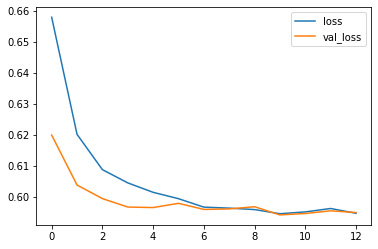

In [76]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

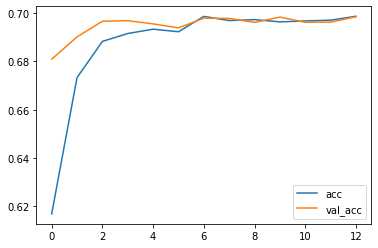

In [77]:
metrics[['acc','val_acc']].plot()

In [79]:
import os
from tensorflow.keras.models import load_model,save_model
#os.makedirs('models/')
#model.save('models/model1.h5')
save_model(model,'models/model1.h5')

In [80]:
model = load_model(filepath='models/model1.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Predictions

In [81]:
from sklearn.metrics import classification_report

In [82]:
pred = np.argmax(model.predict(X_test),axis=-1)

In [83]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      4236
           1       0.71      0.74      0.72      4856

    accuracy                           0.70      9092
   macro avg       0.70      0.70      0.70      9092
weighted avg       0.70      0.70      0.70      9092



We observe a 70% accuracy for predicting if a patient is COVID+ve/Symptomatic or Healthy

In [84]:
single_sample = X_test[89]

In [96]:
single_sample.reshape(1,-1).shape

(1, 37)

In [98]:
np.argmax(model.predict(single_sample.reshape(1,-1)),axis=-1)

array([1], dtype=int64)

In [99]:
y_test[89]

1

# CNN model approach

In [100]:
from tensorflow.keras.layers import Conv1D, MaxPool1D , Flatten 

In [131]:
#model

cnn_model = Sequential()

cnn_model.add(Conv1D(filters=32,kernel_size=(2),padding='same',input_shape=(37,1),activation='relu'))
cnn_model.add(MaxPool1D())

cnn_model.add(Conv1D(filters=32,kernel_size=(2),padding='same',input_shape=(37,1),activation='relu'))
cnn_model.add(MaxPool1D())

cnn_model.add(Conv1D(filters=64,kernel_size=(2),padding='same',input_shape=(37,1),activation='relu'))
cnn_model.add(MaxPool1D())

cnn_model.add(Flatten())

cnn_model.add(Dense(100,activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(20,activation='relu'))

cnn_model.add(Dense(2,activation='sigmoid'))

#compile

cnn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [132]:
cnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 37, 32)            96        
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 18, 32)            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 18, 32)            2080      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 9, 32)             0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 9, 64)             4160      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 4, 64)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)              

In [133]:
cnn_model.fit(X_train.reshape(18458, 37,1),y_train_cat,epochs=15,validation_data=[X_test.reshape(9092, 37,1),y_test_cat],callbacks=[early_stop])

Train on 18458 samples, validate on 9092 samples
Epoch 1/15
18458/18458 [==============================] - 2s 129us/sample - loss: 0.6140 - acc: 0.6779 - val_loss: 0.6032 - val_acc: 0.6952
Epoch 2/15
18458/18458 [==============================] - 2s 102us/sample - loss: 0.5962 - acc: 0.7013 - val_loss: 0.5950 - val_acc: 0.6956
Epoch 3/15
18458/18458 [==============================] - 2s 114us/sample - loss: 0.5897 - acc: 0.7038 - val_loss: 0.5860 - val_acc: 0.7037
Epoch 4/15
18458/18458 [==============================] - 2s 106us/sample - loss: 0.5835 - acc: 0.7093 - val_loss: 0.5877 - val_acc: 0.7050
Epoch 5/15
18458/18458 [==============================] - 2s 102us/sample - loss: 0.5786 - acc: 0.7102 - val_loss: 0.5757 - val_acc: 0.7166
Epoch 6/15
18458/18458 [==============================] - 2s 108us/sample - loss: 0.5764 - acc: 0.7158 - val_loss: 0.5728 - val_acc: 0.7176
Epoch 7/15
18458/18458 [==============================] - 2s 102us/sample - loss: 0.5717 - acc: 0.7149 - val_lo

In [134]:
metrics = pd.DataFrame(cnn_model.history.history)

In [135]:
metrics

,loss,acc,val_loss,val_acc
0,0.613975,0.677863,0.603209,0.695227
1,0.596151,0.701268,0.595035,0.695612
2,0.589683,0.703814,0.585973,0.703696
3,0.583493,0.709313,0.587653,0.704960
4,0.578647,0.710153,0.575696,0.716619
5,0.576424,0.715814,0.572774,0.717609
6,0.571738,0.714893,0.575290,0.715134
7,0.568935,0.717710,0.571776,0.713264
8,0.566273,0.720094,0.567494,0.718104
9,0.563163,0.722099,0.572223,0.714969


<AxesSubplot:>

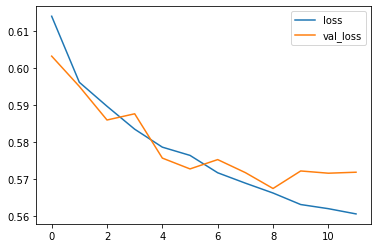

In [136]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

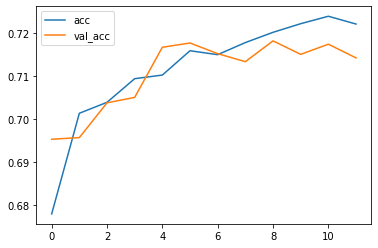

In [137]:
metrics[['acc','val_acc']].plot()

In [138]:
pred = np.argmax(cnn_model.predict(X_test.reshape(9092, 37,1)),axis=-1)

In [139]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      4236
           1       0.74      0.71      0.73      4856

    accuracy                           0.71      9092
   macro avg       0.71      0.71      0.71      9092
weighted avg       0.72      0.71      0.71      9092



We observe that CNN gives 72% precision which is better than ANN

In [140]:
#Single sample
sample = X_test[1789]

In [142]:
np.argmax(cnn_model.predict(sample.reshape(1,37,1)),axis=-1)

array([0], dtype=int64)

In [143]:
y_test[1789]

0

In [146]:
save_model(model,'models/model_ANN.h5')
save_model(cnn_model,'models/model_CNN.h5')